<a href="https://colab.research.google.com/github/adya-b/python-projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Univariate Analysis**

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

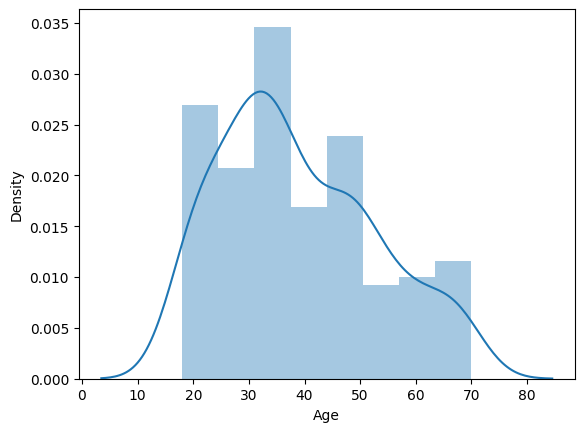

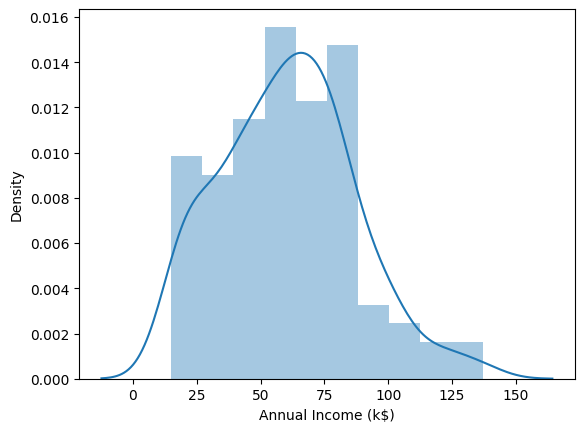

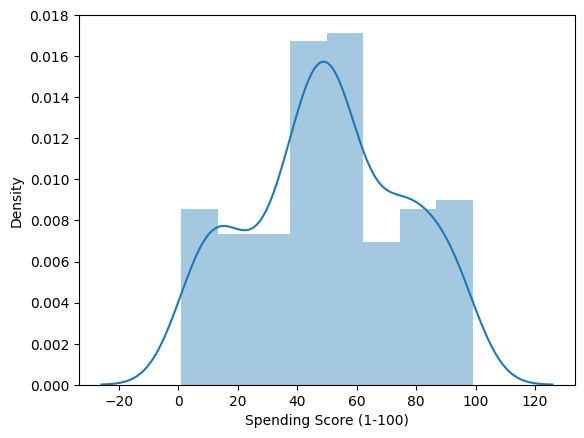

In [6]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

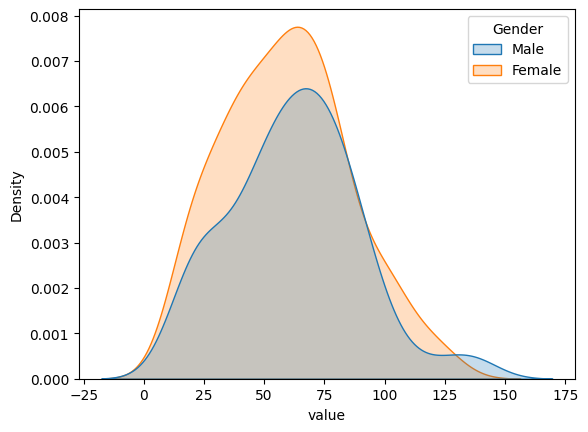

In [7]:
melted_df = df.melt(id_vars='Gender', value_vars=['Annual Income (k$)'])
sns.kdeplot(data=melted_df, x='value', hue='Gender', shade=True);

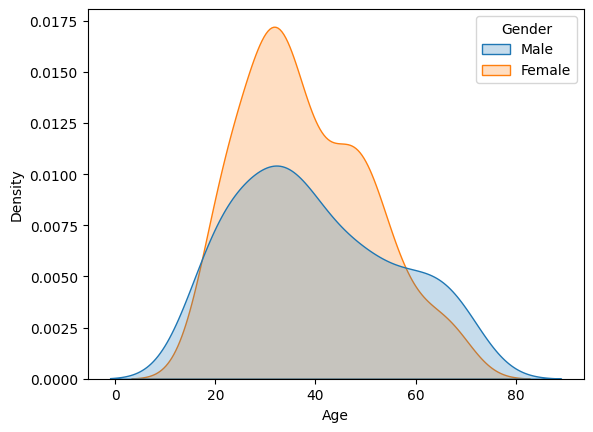

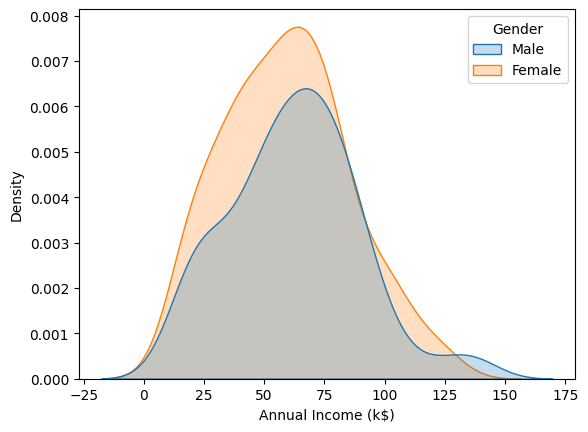

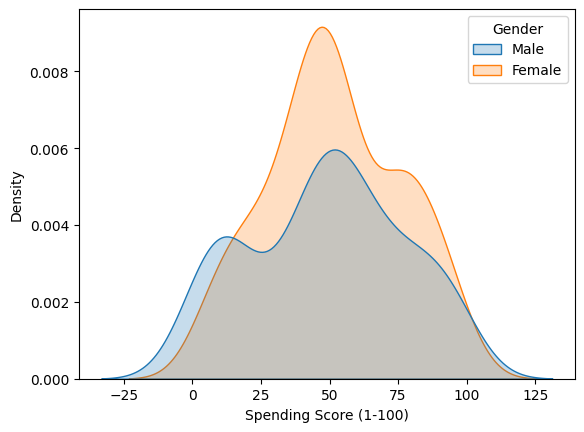

In [8]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=melted_df, x=df[i], hue='Gender', shade=True);

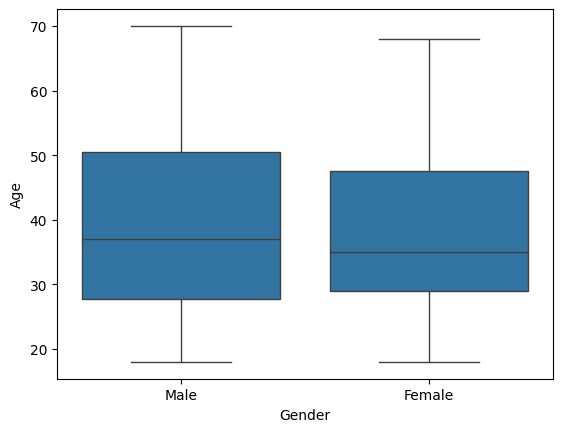

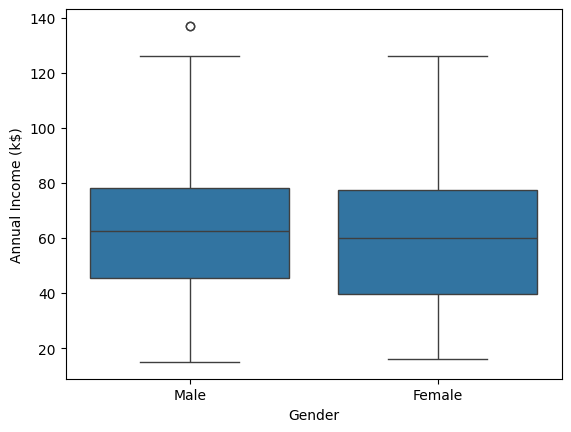

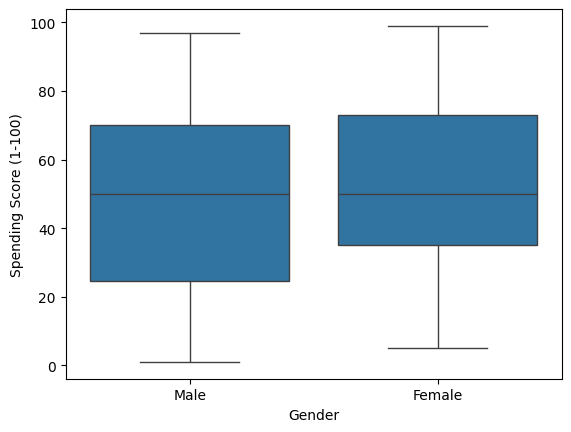

In [9]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [10]:
df['Gender'].value_counts(normalize=True) #gives percentage of M,F population

,proportion
Gender,
Female,0.56
Male,0.44


**Bivariate Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

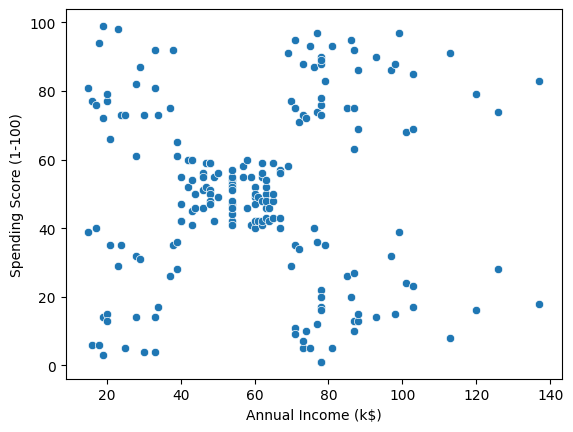

In [11]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

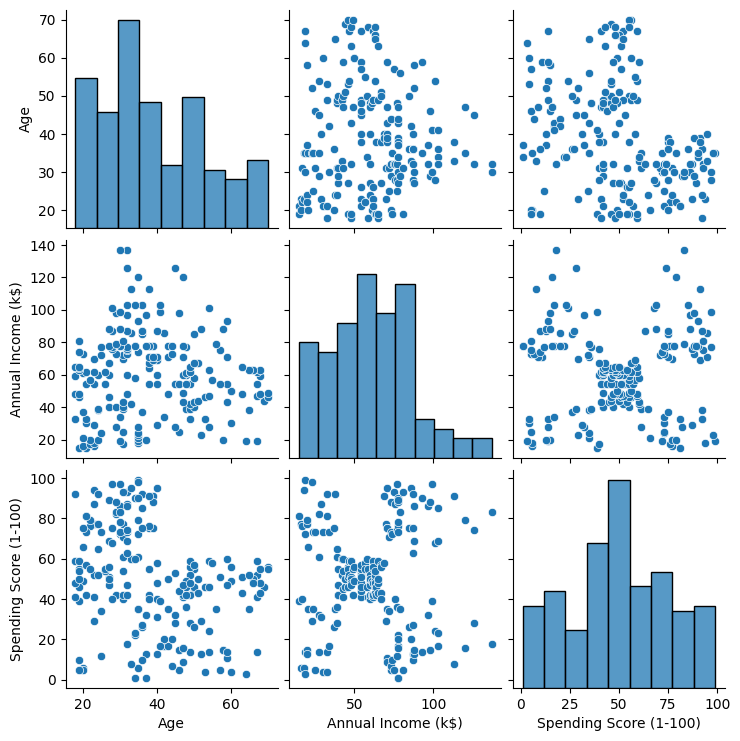

In [12]:
df=df.drop('CustomerID',axis=1) #since its constant and does not add any value to our analysis [axis = 1 is cols and axis=0 is rows]
sns.pairplot(df)

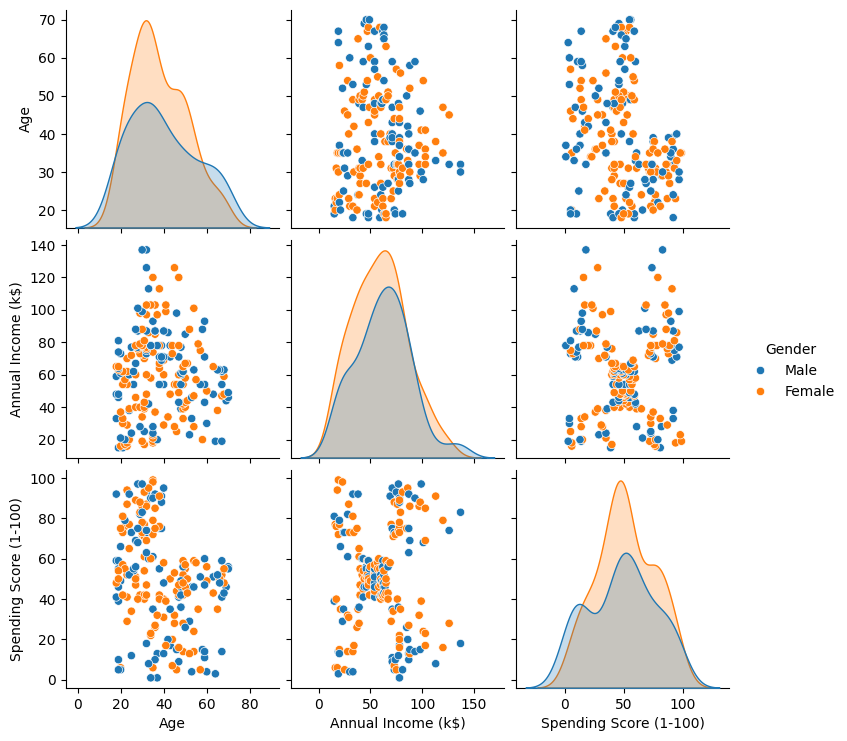

In [13]:
sns.pairplot(df,hue='Gender')

In [14]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

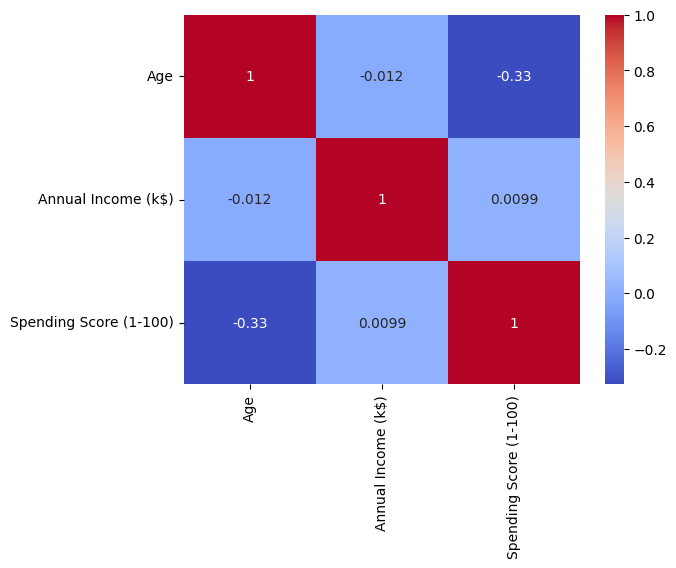

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

**Univariate Clustering**

In [17]:
clustering1=KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
df['income Cluster']=clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [20]:
df['income Cluster'].value_counts()

,count
income Cluster,
2,90
0,74
1,36


In [21]:
clustering1.inertia_

23517.33093093092

In [22]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.2800000002,
 49761.737012987025,
 25640.457784396807,
 13575.75844155842,
 8481.49619047619,
 7102.597955305562,
 4424.823725981626,
 3382.880286380288,
 2192.2498778998774,
 1868.3265873015866]

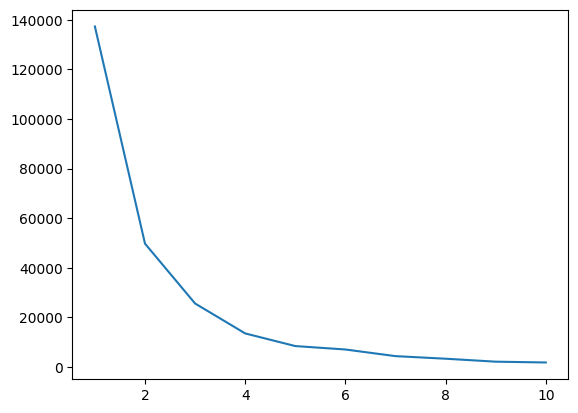

In [23]:
plt.plot(range(1,11),inertia_scores)
#this tells us that the elbow starts at 3 so we can now have 3 clusters

In [24]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income Cluster'],
      dtype='object')

In [25]:
df.groupby('income Cluster')[ ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


**Bivariate Clustering**

In [26]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,4
2,Female,20,16,6,0,1
3,Female,23,16,77,0,4
4,Female,31,17,40,0,1


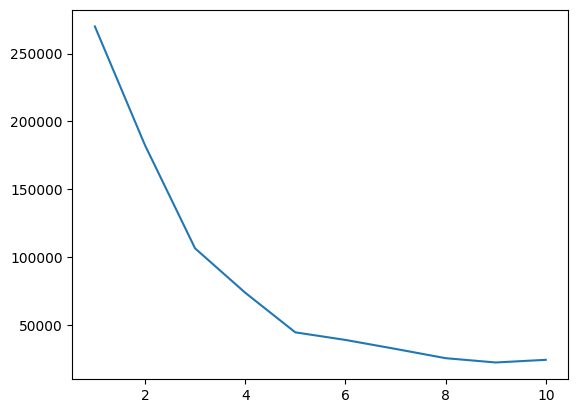

In [27]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

#this makes us realise that the elbow is at 5 so we can have a cluster of 5

In [28]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y','z']

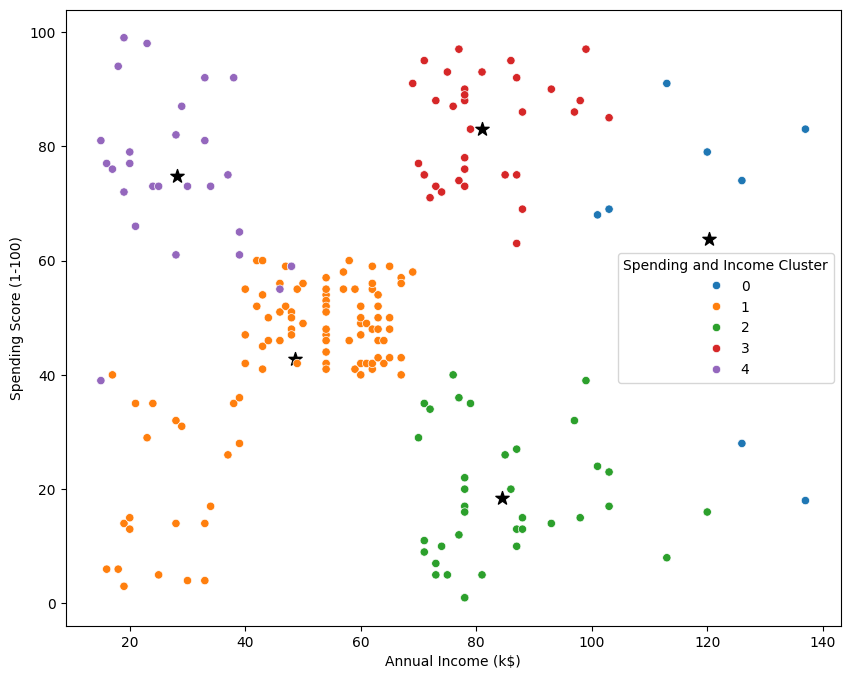

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['y'],y=centers['z'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [30]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.500000,0.500000
1,0.614583,0.385417
2,0.472222,0.527778
3,0.545455,0.454545
4,0.518519,0.481481


In [31]:
df.groupby('Spending and Income Cluster')[ ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,34.000000,120.375000,63.750000
1,44.770833,48.635417,42.812500
2,40.500000,84.527778,18.388889
3,32.727273,81.060606,83.000000
4,24.518519,28.222222,74.777778


**Multivariate Clustering**

In [32]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,4
2,Female,20,16,6,0,1
3,Female,23,16,77,0,4
4,Female,31,17,40,0,1


In [33]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,4,True
1,21,15,81,0,4,True
2,20,16,6,0,1,False
3,23,16,77,0,4,False
4,31,17,40,0,1,False


In [34]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [35]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


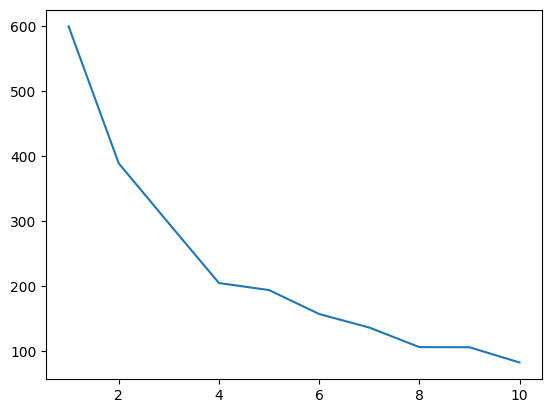

In [36]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

#here we have the elbow around 4 so optimal no of clusters=4

In [37]:
# Fit K-means with optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dff)

# Add cluster labels to the original dataset
X_clustered = dff.copy()
X_clustered['Cluster'] = kmeans.labels_

# Filter data to include only the n clusters
filtered_data = X_clustered[X_clustered['Cluster'].isin(range(4))]
kmeans3.cluster_centers_

array([[ 0.61233873, -0.14037369, -0.12080356],
       [-0.97004642, -1.35366972,  1.15873115],
       [-0.44674764,  0.75632724,  1.27092084],
       [-0.9780205 ,  0.56813075, -1.26730828],
       [ 1.17338538, -1.28478299, -1.44416206],
       [-1.01789088, -0.26820386,  0.05176208],
       [ 0.41652283,  1.21179129, -1.28588954],
       [ 1.86593393, -0.28283547, -0.01358755],
       [-0.3415442 , -1.41282407, -0.96065717],
       [-0.41983513,  2.06703817,  1.0958772 ]])

In [38]:
dff.value_counts()

0          1          2        
-1.496335  -1.051949   1.622741    1
           -0.479408   0.341630    1
           -0.059544  -0.357158    1
            0.169472  -0.085407    1
-1.424569  -1.738999  -0.434801    1
                                  ..
 2.091999  -0.059544   0.186343    1
            0.093133  -0.279515    1
 2.163766  -0.632086  -0.163051    1
 2.235532  -0.555747   0.225165    1
           -0.441239   0.186343    1
Name: count, Length: 200, dtype: int64

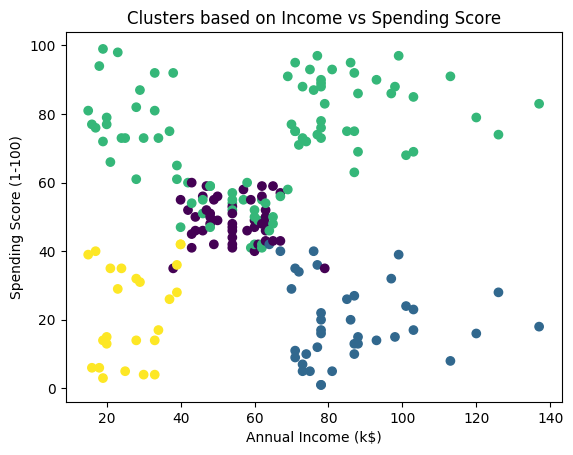

In [39]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=filtered_data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters based on Income vs Spending Score')
plt.show()

In [48]:
#Displaying the details of our target cluster
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
cluster_number = 4
cluster_details = df[df['Cluster'] == cluster_number]
cluster_details

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Cluster,Cluster


In [47]:
cluster_profiles = df.groupby('Cluster').agg({'Age': ['mean', 'std'],
                                             'Annual Income (k$)': ['mean', 'std'],
                                             'Spending Score (1-100)': ['mean', 'std']})
print(cluster_profiles)

               Age            Annual Income (k$)             \
              mean        std               mean        std   
Cluster                                                       
0        52.057971  11.022549          46.420290  14.934569   
1        32.875000   3.857643          86.100000  16.339036   
2        25.056604   5.478683          40.735849  16.768963   
3        40.394737  11.376931          87.000000  16.271348   

        Spending Score (1-100)             
                          mean        std  
Cluster                                    
0                    39.884058  16.075682  
1                    81.525000   9.999968  
2                    62.622642  16.513661  
3                    18.631579  10.915947  


In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(dff, kmeans.labels_)

np.float64(0.39598786472694064)

In [50]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Cluster,Cluster
0,Male,19,15,39,0,4,2
1,Male,21,15,81,0,4,2
2,Female,20,16,6,0,1,0
3,Female,23,16,77,0,4,2
4,Female,31,17,40,0,1,2
...,...,...,...,...,...,...,...
195,Female,35,120,79,1,0,1
196,Female,45,126,28,1,0,3
197,Male,32,126,74,1,0,1
198,Male,32,137,18,1,0,3


**Analysis**

Cluster 1 is the target group for marketing new products since it has the intersection of high spending score and high income
54% of cluster 1 are women, we can increase our sales by having marketing campagins targeted to this gender demographic and look into pushing products that attract them

Cluster 2 presents an interesting opportunity to market items on Sale since they are an interesection of low income and spending score

Analysing clusters based on gender for targeted marketing we can see that cluster 4 will be the ideal cluster to go after interms of maintaining revenue because it has the best spending to income ratio